# Pythonで学ぶ音声合成　機械学習実践シリーズ　まとめノート

# 第1章（音声合成とは）
- 音声を計算機的に作り出す技術の総称
- 何を入力にして音声を合成するかによって細分化される。
- この本では主にtext-to-speech(TTS)について書いてあるが、広義には声質変換やマルチモーダル信号からの音声合成も含むとのこと。

# 第2章（音声の情報と物理）

## 2章-1節　音声の情報的側面

<details>
<summary>3つの情報</summary>

1. **言語情報**: テキスト化できる記号（文字、読み、アクセントなど）  
   → **テキスト音声合成**

2. **パラ言語情報**: テキスト化できないが意図的なもの（発話スタイル、感情など）  
   → **感情音声合成**

3. **非言語情報**: テキスト化できないかつ意図的でないもの（性別、年齢など）  
   → **多話者音声合成**など

   - 実例: 音声合成システムに話者識別モデルを追加することで、異なる話者の声質を再現。声質のパラメータ（F0, フォルマント周波数）を調整することで幅広い話者の表現が可能。

</details>

<details>
<summary>コンテキストとは</summary>

- **音素 (phoneme)**  
  - /a/など、日本語は44セットある。

  - **母音 (vowel)**  
    - 無声化母音: 日本語特有の現象で、母音が子音間で無声化される。  
   - 例: 「好き」/suki/ が /s|ki/ となる。

  - **子音 (consonant)**  
    - 拗音・撥音・促音を含む日本語特有の音素。

- **音節 (syllable)・モーラ**  
  - 音素より大きな単位。モーラに基づくリズムは日本語音声合成において重要。  
  - アクセント核 (下げ核): ピッチの高低変化が言語特性に影響を与える。

- **語 (word)**

    - **形態素解析**:
        - 形態素解析とは、自然言語の文章を意味を持つ最小単位である「形態素」に分割し、それぞれの品詞や活用形などの情報を付与する技術です。
        - 日本語は、英語のように単語間にスペースがないため、単語の境界を特定するのが難しい言語です。

- **イントネーションとアクセント**  
    - **イントネーション**: 話者の意図に基づく音高の変化。
    - **アクセント**: 単語固有の音高の動き。特に日本語はピッチアクセントであり、音声生成においてはアクセント位置を考慮。

- **リズム**: 等時性  
    - 音声合成においてリズムは自然な発話に必要不可欠で、特にテキストからリズム情報を抽出してパターン化する。

</details>


## 2章-2節　音声の物理的側面

<details>
<summary>フーリエ変換（詳細は4章）</summary>

- 音声を**振幅スペクトル**と**位相スペクトル**に分解。音声の特徴（フォルマント周波数など）を抽出する基盤技術。
    <img src="https://github.com/necococo/images/blob/main/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88%202024-11-09%205.11.05.png?raw=true" width="800"  alt="フーリエ変換">

</details>

<details>
<summary>音声生成過程</summary>

- **呼吸器官**  
 - 音声生成のエネルギー源であり、呼吸量や気圧の調整で音声強度が決定。

- **発声器官(声帯)**
 - F0とよばれる声帯振動の基本周波数で特徴づけられ、話者の年齢や性別によって異なり、音声合成の際、話者の特徴を再現するために使用される。

- **調音器官(声道)**  
 - 振幅スペクトルで見るといくつかのピークが見られる。
 - これをフォルマントといい、その周波数をフォルマント周波数という。
 - 周波数の低い順にF1,F2,...。
 - フォルマント周波数は音色に関わる要素で、音声の識別性に寄与。

</details>

<details>
<summary>音声のパラメータ表現とその復号</summary>

- **Vocoder**（ボコーダ）  
  - channel vocoder: 周波数帯を分割し、それぞれをエンコード。
  - phase vocoder: 位相と周波数を時間軸で分解。
  - sinusoidal vocoder: 正弦波で音声を近似。  
    補足: 世界的に使用されるWaveNet、Tacotronなどもボコーダ技術に基づく。

</details>

<details>
<summary>位相に関して</summary>

- 人間の聴覚は位相に鈍感だが、音声合成の精度向上において位相情報の処理は不可欠。  
  補足: 現在のディープラーニングでは、事前学習で最適な位相を予測する技術が進歩。

</details>

<details>
<summary>ソース・フィルタモデルとスペクトラル包絡</summary>

- source: 有声音はF0に応じた櫛形状のパワースペクトルとなる。
- 声帯振動: 声帯振動の有無により、音声は有声音と無声音に分類される。-12 dB/octaveのスペクトル傾斜で近似できる。
- 声道フィルタ: 声道形状によってスペクトルが変化。フィルタ関数で声道の形状をシミュレートし、共鳴特性を再現できる。
- 放射特性: 音波の空間放射特性を示し、口から放射された後の音波は6 dB/octaveのスペクトル傾斜で近似できる。
- これらをまとめてスペクトラル包絡という。
    <img src="https://github.com/necococo/images/blob/main/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88%202024-11-08%2016.52.24.png?raw=true" width="800"  alt="ソース・フィルタモデル">

</details>

# 第3章（統計的音声合成）
一般的な生成モデルの話に近いので省略

# 第4章（Pythonによる音声信号処理）
## 4章-3節　音声ファイルの読み込み

- **wavファイル**は、線形PCM（linear pulse code modulation）方式の音声データに付加的なヘッダ情報を加えてファイルに格納する形式です。

- **線形PCM方式**では、音声データはサンプリング周波数の逆数の時間間隔でサンプリングされ、所定の量子化ビットで波形の振幅が等間隔（線形）に量子化されます。

- **サンプリング周波数**や**量子化ビット**などの情報は、wavファイルのヘッダに記述されます。
  - サンプリング周波数: 16kHz, 24kHz, 48kHz など
  - 量子化ビット: 16bit など

- デジタル音声はアナログ音声をサンプリングしたものであるため、離散時間信号と言えます。

In [ ]:
# !pip install ttslearn
!pip install ttslearn --no-build-isolation

In [ ]:
from scipy.io import wavfile
import ttslearn
import numpy as np
sr, wav = wavfile.read(ttslearn.util.example_audio_file())

print(sr) # 48kHz
print(wav.shape) # 153120 points
print(len(wav) / sr) # 3.19s
print(wav) # [  74   47   17 ... -144 -143 -144]
print((wav.dtype)) # 16bit
print(type(wav)) # <class 'numpy.ndarray'>
# print(np.info(wav))

48000
(153120,)
3.19
[  74   47   17 ... -144 -143 -144]
int16
<class 'numpy.ndarray'>
class:  ndarray
shape:  (153120,)
strides:  (2,)
itemsize:  2
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x5a75e22cd2d0
byteorder:  little
byteswap:  False
type: int16
None


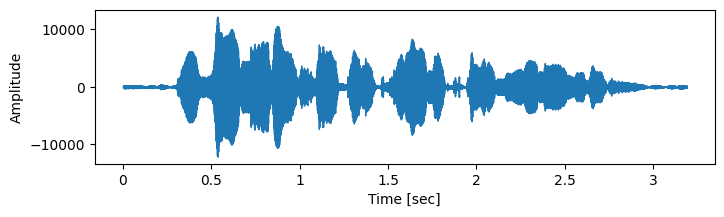

In [ ]:
import librosa
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 2))
librosa.display.waveshow(wav.astype(np.float32), sr=sr) # waveplot() ---> waveshow() (from v0.9.0)
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Amplitude");

In [ ]:
import IPython
IPython.display.Audio(wav, rate=sr, autoplay=True)

## フーリエ変換と逆フーリエ変換

- フーリエ変換の定義式：  
  $$ X[k] = \frac{1}{N} \sum_{n=1}^{N} x[n] e^{-j \frac{2 \pi n k}{N}} $$

  - $ n$: 離散時間、$ k$: 周波数インデックス、$ j$: 複素数、$ x[n]$: 離散信号

### 逆フーリエ変換

- 逆フーリエ変換の定義式：  
  $$ x[n] = \sum_{k=1}^{N} X[k] e^{j \frac{2 \pi n k}{N}} $$

- フーリエ変換は、振幅 $ |X[k]|$ と位相 $ \angle X[k]$ に分けて考えられ、それぞれを**振幅スペクトル**と**位相スペクトル**と呼びます。

  $$ X[k] = |X[k]| \cdot e^{-j \angle X[k]} $$

- $ |X[k]|^2$ を**パワースペクトル**といいます。

- 振幅スペクトル $ |X[k]|$ は、サンプリング周波数を $ k/N$ 倍した周波数成分の強さと考えられます。

- **ナイキスト周波数**: デジタル信号処理では、サンプリング周波数 $ sr$ の信号は、最大でその半分の周波数（ナイキスト周波数）までの周波数成分を表現可能です。サンプリング周波数が $ sr$ なら、解析できる周波数の上限は $ sr/2$ です。

- **対数振幅スペクトル**は可視化において重要で、デシベル（dB）単位として表されます。  
  $$ 20 \log_{10} |X[k]| $$

- **FFT (Fast Fourier Transform)** の計算量は $ O(N \log N) $ です。

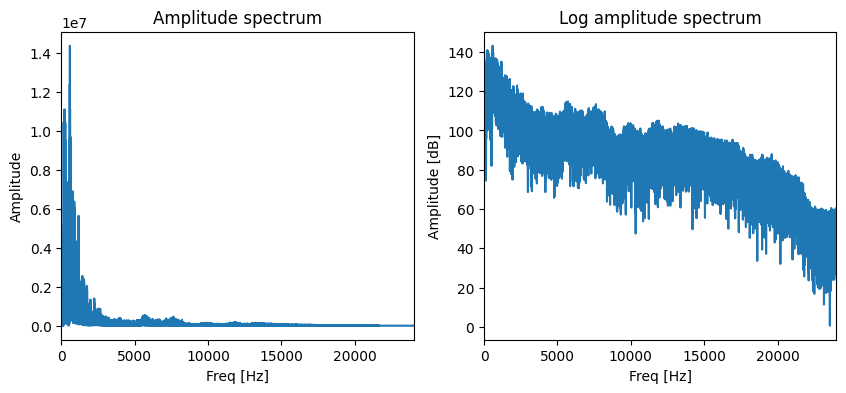

In [ ]:
# FFT O(NlogN)
X = np.abs(np.fft.rfft(wav)) # 振幅スペクトル
logX = 20 * np.log10(X) # 対数振幅スペクトル

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharex=True)
freq = np.arange(len(X)) / 2 / len(X) * sr # ナイキスト周波数の範囲にするので2で割る
ax[0].plot(freq, X)
ax[0].set_title("Amplitude spectrum")
ax[0].set_xlim(0, sr // 2)
ax[0].set_xlabel("Freq [Hz]")
ax[0].set_ylabel("Amplitude");

ax[1].plot(freq, logX)
ax[1].set_title("Log amplitude spectrum") # 中高域が明瞭
ax[1].set_xlabel("Freq [Hz]")
ax[1].set_ylabel("Amplitude [dB]");

## 4-5 短時間フーリエ変換 (STFT)とその逆変換（ISTFT）

### 短時間フーリエ変換 (STFT)
- フーリエ変換では、音声を変換すると時間情報が失われますが、時間に従って周波数成分がどのように変化するかを知りたい場合、STFT (short-time Fourier transform) がよく用いられます。

- **短時間フーリエ変換**は、短い時間で音声を切り出し（フレームと呼ぶ）、そのフレームに対してフーリエ変換を行う手法です。

  - N(or n_fft): 切り出した音声信号の長さ（フレーム長）
  - S(or frame_sifht or hop_length): フレームシフト長
  - m: フレームに対するインデックス
  - w[t]: 窓関数。切り出した際の両端の不連続性をなくすための関数で、区間 $ 0 \leq n < N $のみで0以外の値を持ち、それ以外は0です。
  - win_length: 窓幅（音声は数十ミリ秒で定常とされているので窓幅は20-50msと設定されることが多いです。）

- **窓関数**には、ハニング窓、ハミング窓、ブラックマン窓などがあります。

  - ハニング窓の定義式：  

    $ w[n] = 0.5 - 0.5 \cos\left(\frac{2 \pi n}{N}\right) $

- 本書では簡単のため、窓関数の長さ（窓幅=win_length）とフレーム長 N が等しいとします。

- 窓関数を用いて切り出した音声信号は以下のように表されます：

  $$ x_m[n - mS] = w[n - mS] x[n] $$

- 変数変換 t = n - mS を行うと、短時間フーリエ変換は以下の式となります：

  $$ X[m, k] = \sum_{t=0}^{N-1} x_m[t] e^{-j \frac{2 \pi k t}{N}} $$

- STFTでは、$ m = 1, 2 , \dots, M-1, M $  として音声波形をずらしながらフーリエ変換を行います。

- **STFT**の結果で、振幅スペクトルをフレーム方向に並べた2次元表現を**振幅スペクトログラム**、位相スペクトルをフレーム方向に並べた2次元表現を**位相スペクトログラム**と呼び、これらは時間周波数表現とされます。

- 実用上、窓幅を先に決め、その値より大きい2の累乗の値を n\_fft とし、フレームシフトには窓幅の1/4がよく用いられます。

- 時間解像度と周波数解像度のトレードオフがあり、これは**時間周波数分解能の不確定性**として知られています。

### 逆短時間フーリエ変換 (ISTFT)による音声の復元
- **フーリエの逆変換と異なり、このISTFTは信号の完全な再構成を保証しないが、多くの場合は高い精度で音声を再構成できます。**

### スペクトルとスペクトログラムの違い
- スペクトルは1つの時間フレームにおける周波数成分の分布で、時間軸は持ちません。
- スペクトログラムは時間軸を持ち、時間の進行に伴う周波数成分の変化を示すものです。スペクトルを連続的に並べた結果ともいえます。

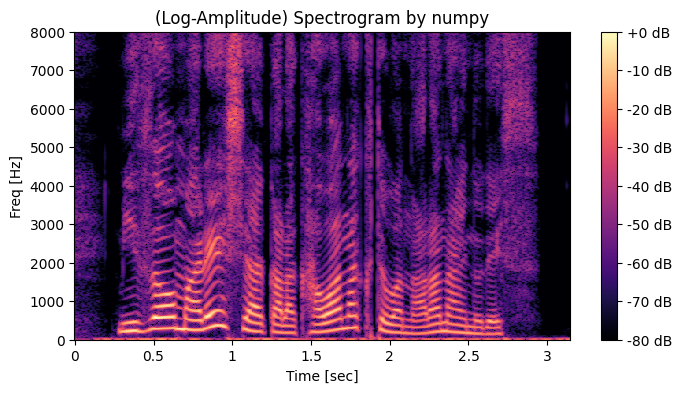

In [ ]:
def hanning(N):
    n = np.arange(N)
    w = 0.5 - 0.5 * np.cos(2*np.pi * n / N)
    return w

def stft(x, N, S):
    # N: frameの長さ
    # S: frame_shift
    w = hanning(N) # 簡単のため窓関数の長さ（窓幅）とフレーム長Nは等しいとする
    M = (len(x) - N) // S + 1 # 全フレーム数を計算=index総数
    X = np.zeros((M, N//2 + 1), dtype=complex) # 結果の格納用、0からナイキスト周波数までのものがM個入る
    # 音声をずらして切り出し、フーリエ変換
    for m in range(M):
        x_m = w * x[m*S: m*S+N]
        X[m, :] = np.fft.rfft(x_m)
    return X

frame_shift = int(sr * 0.005) # 5msのフレームシフト 48000*0.005=240 points
n_fft = 2048 # 周波数解像度=フレームごとに2048ポイントのFFTが計算されます。

X = stft(wav.astype(np.float32), n_fft, frame_shift) # スペクトログラム
logX = librosa.amplitude_to_db(np.abs(X), ref=np.max) # 対数振幅に変換、最大値を0に正規化

fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
img = librosa.display.specshow(logX.T, hop_length=frame_shift, sr=sr, x_axis="time", y_axis="hz", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set_ylim(0, 8000) # 音声のパワーは低域に集中するため8000Hzまでを表示
ax.set_title("(Log-Amplitude) Spectrogram by numpy")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Freq [Hz]");

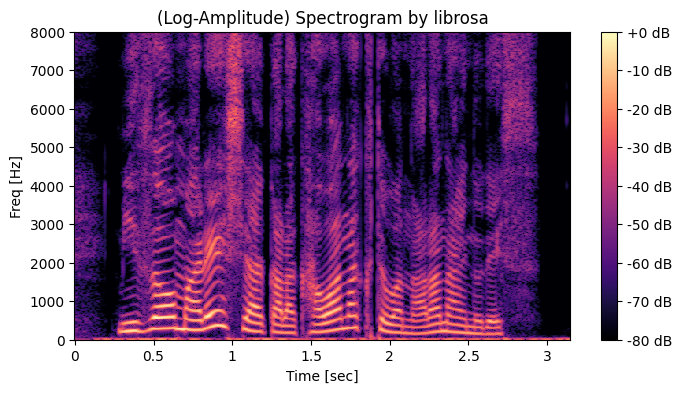

In [ ]:
"""同じことをlibrosaで行う。ただしlibrosa.stftは、STFTを実行する前にデフォルトで信号の冒頭と末尾にパディング処理を行います。前述のSTFT実装はこの処理をサポートしていないため、同等のSTFTの結果を得るためには、center=False としてパディング処理を行わないように設定します。"""

X = librosa.stft(wav.astype(np.float32), n_fft=n_fft, win_length=n_fft, hop_length=frame_shift, window="hann", center=False).T
logX = librosa.amplitude_to_db(np.abs(X), ref=np.max) # 対数振幅に変換、最大値を0に正規化

fig, ax = plt.subplots(1, 1, figsize=(8, 4), sharex=True)
img = librosa.display.specshow(logX.T, hop_length=frame_shift, sr=sr, x_axis="time", y_axis="hz", ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set_ylim(0, 8000) # 音声のパワーは低域に集中するため8000Hzまでを表示
ax.set_title("(Log-Amplitude) Spectrogram by librosa")
ax.set_xlabel("Time [sec]")
ax.set_ylabel("Freq [Hz]");

In [ ]:
# 元音声、再掲
IPython.display.Audio(wav.astype(np.float32), rate=sr)

In [ ]:
# STFT
X = librosa.stft(wav.astype(np.float32), n_fft=n_fft, win_length=n_fft, hop_length=frame_shift, window="hann")
# ISTFT
X_hat = librosa.istft(X, n_fft=n_fft, win_length=n_fft, hop_length=frame_shift, window="hann")

# STFT->ISTFT(reconstructed)
IPython.display.Audio(X_hat.astype(np.float32), rate=sr)

## 4章6節　メルスペクトログラム
- 短時間フーリエ変換で得られる振幅スペクトログラムに対して周波数軸を人間の聴覚特性（メル尺度）に合うように変換して得られる時間周波数表現。
- 線形の周波数尺度からメル尺度への変換式は以下の通り
$$ f_{\text{mel}} = 2595 \cdot \log_{10}\left(1 + \frac{f}{700}\right) $$
- より少ない次元で音声パラメータを表現できる。
- フレーム長が1024 sampleの場合、振幅スペクトルの次元は 1024//2+1=513 だが、メルスペクトログラムでは（後述するフィルタバンクによるが）高々80となる。
- メル尺度に沿った特定の周波数帯域のみを通過させるフィルタの集合（フィルタバンク）を振幅スペクトログラムに適用する。

    <img src="https://github.com/necococo/images/blob/main/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88%202024-11-09%2014.50.19.png?raw=true" width="800"  alt="フィルタバンクの適用">
- 低域ほど詳細で、高域ほど粗い周波数解像度のフィルタを考えることになる。
- このフィルタバンクをすべてのフレームの振幅スペクトルに適用するが、それは**振幅スペクトログラムとメルフィルタバンクとを内積**することに相当する。

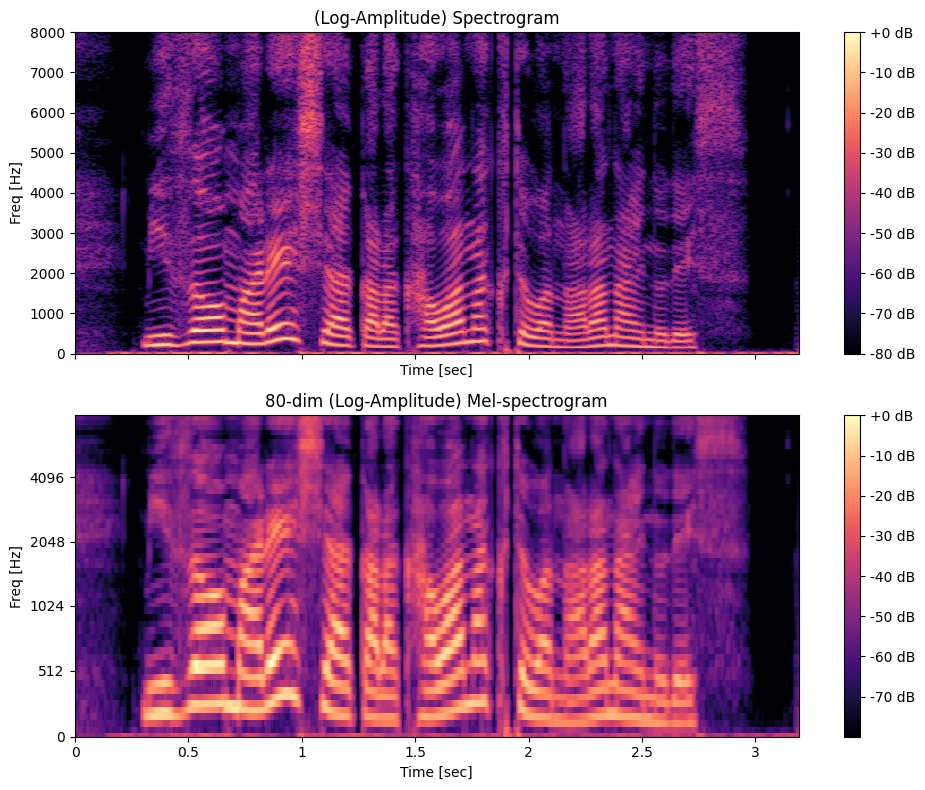

In [ ]:
# スペクトログラム
X = librosa.stft(wav.astype(np.float32), n_fft=n_fft, win_length=n_fft, hop_length=frame_shift, window="hann")

# 80次元対数振幅メルスペクトログラム
n_mels = 80
melfb = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
melspec = librosa.amplitude_to_db(np.dot(melfb, np.abs(X)), ref=np.max)

# 縦に2つのプロットを作成
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# 上段: 比較用の対数振幅スペクトログラム
img0 = librosa.display.specshow(librosa.amplitude_to_db(np.abs(X), ref=np.max),
                                sr=sr, hop_length=frame_shift, x_axis="time", y_axis="hz", ax=ax[0])
fig.colorbar(img0, ax=ax[0], format="%+2.0f dB")
ax[0].set_ylim(0, 8000)
ax[0].set_title("(Log-Amplitude) Spectrogram")
ax[0].set_xlabel("Time [sec]")
ax[0].set_ylabel("Freq [Hz]")

# 下段: 対数振幅メルスペクトログラム
img1 = librosa.display.specshow(melspec, sr=sr, hop_length=frame_shift, x_axis="time", y_axis="mel", ax=ax[1])
fig.colorbar(img1, ax=ax[1], format="%+2.0f dB")
ax[1].set_ylim(0, 8000)
ax[1].set_title("80-dim (Log-Amplitude) Mel-spectrogram")
ax[1].set_xlabel("Time [sec]")
ax[1].set_ylabel("Freq [Hz]")

plt.tight_layout()

## 4章7節　Griffin-Limのアルゴリズムに基づく位相復元
- 振幅スペクトログラムのみから位相を推定
- 位相をランダムに初期化し、短時間フーリエ変換とその逆変換を行ったときのスペクトログラムの無矛盾性に基づき位相を繰り返し更新
- 反復回数が必要なので近年ではニューラルボコーダーが使用される（ので省略）


# 第５章（深層学習に基づく統計的パラメトリック音声合成）
<details>
<summary>５章１節</summary>

- 音響モデル: 統計的パラメトリック音声合成において（フレーム単位の）言語特徴量から音響特徴量を予測するモデルは音響モデル（acoustic model）と呼ばれる。
- 継続長モデル: その前に言語と音響の系列長が異なるので、言語構成単位の特徴量からフレーム単位の言語特徴量への変換が必要（これを継続長モデル/duration modelという）
- この２つのモデルが必要。(Attentionを使えば系列長の異なる特徴量の直接変換が可能
なので一つで良い)
- 学習手順
    - データ準備：
        - テキストデータ-->テキスト解析-->言語特徴量（第２章１節のコンテキスト）
        - **音素アラインメント**-->(フレーム単位の言語特徴量, 音素系列長)、近年はこれはいらない。
        - 音声データ-->音響特徴量
        <img src="https://github.com/necococo/images/blob/main/%E3%82%B9%E3%82%AF%E3%83%AA%E3%83%BC%E3%83%B3%E3%82%B7%E3%83%A7%E3%83%83%E3%83%88%202024-11-10%206.27.24.png?raw=true" width=800 alt="DNN音声合成の構成">
</details>

# 第5章2節-巻末
- 少し古いので必要になったときに辞書的に参考にすることにした。

<br>     

# 以下は私が最近のTTS関連の技術や論文を調査したものです。

# CNF、Flow Matching、Conditional Flow Matching（と比較としての拡散モデル）の概要

## ストーリー：
- 生成モデルの分野では、拡散モデルよりも高速に高品質に生成する手法が求められており、Flow Matchingが注目されています。Flow MatchingはCNF（Continuous Normalizing Flow）というモデル（後述）を効率的に学習させるために考案された学習手法です。しかしそのままでは真のデータ分布を近似することは計算が難しいので、Conditional Flow Matching (CFM)というものが考案されました。https://arxiv.org/pdf/2210.02747

<br>

## Continuous Normalizing Flows (CNF)

- CNFは、基準分布 $p(z)$からデータ分布 $p(x)$ に連続的に変換する手法です。この変換は、以下のODEで表されます：

$$
\frac{d\phi_t(x)}{dt} = v_t(\phi_t(x))
$$

- ここで、$\phi_t(x)$ は時刻 $t$ におけるデータ点 $x$ の変換、$v_t$ はベクトル場を示します。このアプローチにより、複雑なデータ分布を連続的な変換（これをFlowと呼びます）でモデル化できます。

<br>

## Flow Matching (FM)

- CNFの学習手法として、Flow Matching (FM) が提案されました。FMは、目標とするベクトル場 $u_t(x)$ に対して、モデルのベクトル場 $v_t(x)$ を近似することを目的とします。その損失関数は以下の通りです：

$$
L_{FM}(\theta) = \mathbb{E}_{t, x \sim p_t(x)} \left[ | v_t(x; \theta) - u_t(x) |^2 \right]
$$

- ここで、$\theta$ はモデルのパラメータ、$p_t(x)$ は時刻 $t$ におけるデータ分布です。しかし、$u_t(x)$ の計算には積分が含まれ、計算が困難であるという課題があります。

<br>

## Conditional Flow Matching (CFM)

- この課題を解決するために、Conditional Flow Matching (CFM) が提案されました。CFMでは、データサンプル $x_1$ を条件として、条件付きベクトル場 $u_t(x|x_1)$ を直接学習します。これにより、$u_t(x)$ の計算に伴う積分の問題を回避できます。CFMの損失関数は以下の通りです：

$$
L_{CFM}(\theta) = \mathbb{E}_{t, x, x_1} \left[ | v_t(x; \theta) - u_t(x|x_1) |^2 \right]
$$

- CFMは、条件付きベクトル場を直接学習することで、CNFの効率的な学習を実現します。これにより、複雑なデータ分布のモデル化がより容易になります。

<br>

## 比較としての拡散モデル（Diffusion Model）

- 拡散モデルは、**確率微分方程式（SDE）**を用いてデータの生成を行います。データに徐々にノイズを加え、逆にノイズからデータを生成することで、複雑なデータ分布をモデル化します。

- **順方向過程（Forward Process）**：データにノイズを加え、最終的にノイズだけの状態に変換します。
  $$ dx = f(x, t) \, dt + g(t) \, dW_t $$
  - $x$：データの状態（例：画像や音声）
  - $f(x, t)$：ドリフト項（データにノイズを加える方向の項）
  - $g(t)$：ノイズのスケールを制御する拡散項
  - $W_t$：ウィーナー過程（ランダム性を導入）

- **逆拡散過程（Reverse Process）**：ノイズから元のデータに戻るために、スコア関数（データ分布の勾配情報）を利用してデータを再構築します。(スコアマッチング)
  $$ dx = \left[ f(x, t) - g(t)^2 \nabla_x \log q_t(x) \right] \, dt + g(t) \, d\bar{W}_t $$
  - $\nabla_x \log q_t(x)$：スコア関数（データ分布の勾配）

- 拡散モデルは確率的な経路（SDE）を用いるため、生成速度が遅くなる傾向があります。

- このスコアマッチングのODE版がFlow Matchingだと思います。

<br>

# さらに最近では[Generator Matching](https://arxiv.org/pdf/2410.20587)も
- Generator Matchingは、任意のマルコフ過程を用いた生成モデルのためのフレームワークです。この手法では、マルコフ過程の無限小の進化を特徴付ける**生成演算子（ジェネレーター）**を活用し、データ生成を行います。具体的には、条件付き生成演算子を構築し、単一のデータポイントを生成し、その後、全体のデータ分布を生成するためのマージナル生成演算子を近似します。このアプローチにより、拡散モデルやフローマッチング、離散拡散モデルなど、さまざまな生成モデリング手法を統一的に扱うことが可能となります。

以下に Flow Matching の論文を元に簡単なFM学習コードを書いてみました。

Epoch [0/1000], Loss: 0.3709
Epoch [100/1000], Loss: 0.0175
Epoch [200/1000], Loss: 0.0103
Epoch [300/1000], Loss: 0.0168
Epoch [400/1000], Loss: 0.0254
Epoch [500/1000], Loss: 0.0266
Epoch [600/1000], Loss: 0.0166
Epoch [700/1000], Loss: 0.0187
Epoch [800/1000], Loss: 0.0181
Epoch [900/1000], Loss: 0.0175


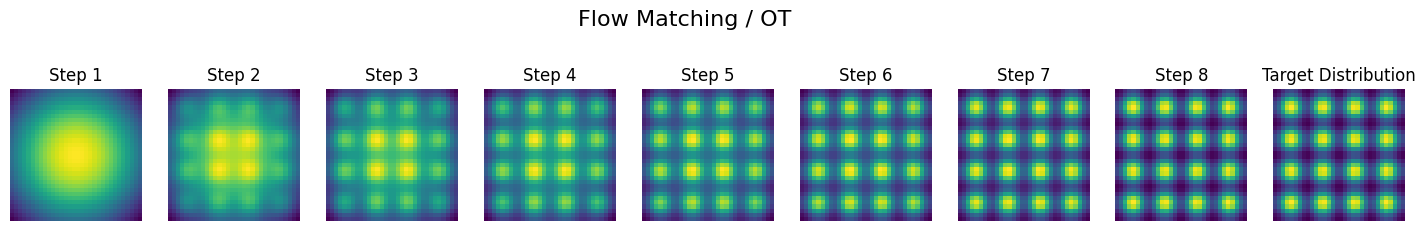

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as T

# パラメータ設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
grid_size = 32
timesteps = 8
learning_rate = 1e-3
epochs = 1000
batch_size = 64

# 初期分布
def generate_initial_distribution(grid_size, sigma=1.0):
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    xx, yy = np.meshgrid(x, y)
    grid = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return torch.tensor(grid, dtype=torch.float32).to(device)

# 目標分布
def generate_target_distribution(grid_size=32, sigma=2.0):
    x = np.linspace(-1, 1, grid_size)
    y = np.linspace(-1, 1, grid_size)
    xx, yy = np.meshgrid(x, y)
    grid = (np.sin(2 * np.pi * xx) * np.sin(2 * np.pi * yy))**2
    grid = torch.tensor(grid, dtype=torch.float32).unsqueeze(0).unsqueeze(0)
    # GaussianBlurで角をぼやけさせる
    blur = T.GaussianBlur(kernel_size=(5, 5), sigma=(sigma, sigma))
    grid = blur(grid).squeeze(0).squeeze(0)
    return (grid / grid.max()).to(device)

# ベクトル場モデル
class VectorField(nn.Module):
    """与えられた位置 (x, y) と時間 t に基づいて、2次元ベクトル場のベクトルを返す"""
    def __init__(self):
        super(VectorField, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(3, 128),
            nn.ReLU(),
            nn.Linear(128, 128),
            nn.ReLU(),
            nn.Linear(128, 2)
        )

    def forward(self, x, y, t):
        input_data = torch.cat([x, y, t], dim=-1)
        return self.fc(input_data)

# Flow Matching損失
def flow_matching_loss(v_t, u_t):
    """v_tがモデルの予測分布で、u_tがデータ分布"""
    return torch.mean((v_t - u_t) ** 2)

# 初期分布と目標分布を生成
initial_dist = generate_initial_distribution(grid_size, sigma=1.0)
target_dist = generate_target_distribution(grid_size, sigma=2.0)

# モデル、最適化、損失関数の設定
model = VectorField().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# トレーニングループ
for epoch in range(epochs):
    optimizer.zero_grad()

    # 決められた範囲の座標と時間のサンプルを生成
    x = torch.rand(batch_size, 1).to(device) * 2 - 1 # [-1, 1]
    y = torch.rand(batch_size, 1).to(device) * 2 - 1 # [-1, 1]
    t = torch.rand(batch_size, 1).to(device) # [0, 1]

    # 連続的な座標値を、整数のグリッドインデックスに変換
    grid_x = torch.clamp(((x + 1) * (grid_size - 1) / 2).long().squeeze(), 0, grid_size - 1)
    grid_y = torch.clamp(((y + 1) * (grid_size - 1) / 2).long().squeeze(), 0, grid_size - 1)

    u_t_initial = initial_dist[grid_y, grid_x].unsqueeze(1)
    u_t_target = target_dist[grid_y, grid_x].unsqueeze(1)

    alpha = t
    # Optimal Transport (OT path)を線形補間と設定
    u_t = (1 - alpha) * u_t_initial + alpha * u_t_target
    # モデルの予測した時間 t におけるベクトル場のベクトル値
    v_t = model(x, y, t)

    loss = flow_matching_loss(v_t, u_t)
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# 生成過程を可視化
fig, axes = plt.subplots(1, timesteps + 1, figsize=(18, 3))
for i, ax in enumerate(axes[:-1]):
    alpha = i / (timesteps - 1)
    current_dist = (1 - alpha) * initial_dist + alpha * target_dist
    ax.imshow(current_dist.cpu().numpy(), cmap='viridis')
    ax.set_title(f"Step {i + 1}")
    ax.axis('off')

# 最後に目標分布を表示
axes[-1].imshow(target_dist.cpu().numpy(), cmap='viridis')
axes[-1].set_title("Target Distribution")
axes[-1].axis('off')

# 図のタイトルを設定
fig.suptitle("Flow Matching", fontsize=16)
plt.show()

書き終わったところで、 Yoshua Bengio の groupから出ているもっとわかりやすく、よくまとまったノートブックを見つけてしまいました。こちらのノートブックには更に進んだ ミニバッチOT-CFM も紹介されており、確率分布の変換経路が最小コストである（大概は真っ直ぐな輸送）ベクトル場が学習できるようです。

- https://github.com/atong01/conditional-flow-matching/blob/main/examples/2D_tutorials/Flow_matching_tutorial.ipynb

- 最近のTTSではこれらの学習方法が取り入れられているようです。

# 個人的に気になるTTS論文など (2024/11)

- [E2-TTS](https://www.microsoft.com/en-us/research/project/e2-tts/)
    - 完全非自動回帰型ゼロショット音声合成（TTS）システム  
    - あらゆる話者の音声を生成可能  
    - **特徴**:  
        - シンプルなモデル・アーキテクチャと学習スキーム  
        - 人間レベルの自然さを実現  
        - フィラートークンという文字列の長さを不変にするための穴埋めトークンを使用
    - **構成要素**:  
        - フロー・マッチング・トランスフォーマー  
        - ボコーダー  
    - **不要な要素**:  
        - 持続時間モデル  
        - 書記素-音素変換器  
        - 単調アライメント探索  
        - 特定アーキテクチャにおけるクロスアテンションなどの複雑技術

- [F5-TTS](https://github.com/SWivid/F5-TTS)
    - E2-TTSの弱点を克服したといっている。
    - ConvNeXt V2による拡散トランスフォーマー。
    - 揺れサンプリング：推論時間フローステップサンプリング戦略、パフォーマンスを大幅に向上させる。

- [Matcha-TTS](https://github.com/shivammehta25/Matcha-TTS)
    - コンパクトなメモリフットプリント
    - 非常に自然なサウンド
    - 合成が非常に速い

- [Parler-TTS](https://www.text-description-to-speech.com/)
    - Parler-TTSは(F5-TTS baseらしい)軽量のテキスト音声合成モデルです。テキストから高品質で自然な音声を指定されたスタイル(性別、口調、速さ)で生成します。Parler-TTSは完全に[オープンソース](https://huggingface.co/parler-tts)でリリースされています。 データセット、前処理、学習コード、重みのすべてが寛容なライセンスの下で公開されています。

- [VoiceCraft](https://jasonppy.github.io/VoiceCraft_web/)
    - VoiceCraftはニューラルコーデック言語モデルです。
    - 音声信号を離散トークン列に変換し、その列に対して言語モデルを適用することで、言語生成と同じ要領で音声を生成する手法です。
    - **中間表現として、メルスペクトログラムを使わず、音声トークンを利用**している点が特徴です。
    - ゼロショットTTSと音声編集ができます。